In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


from pandas import read_csv
from pandas import set_option

import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [84]:
%cd /content/drive/MyDrive/PYTHON_AI4E/Final Project_Thuy
!ls

/content/drive/MyDrive/PYTHON_AI4E/Final Project_Thuy
 heart_cleveland_upload.csv  'ThuyThuy_final project.ipynb'
'Thuy_final project.ipynb'


In [85]:
df = pd.read_csv('heart_cleveland_upload.csv', sep = ',')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [86]:
df.shape

(297, 14)

In [87]:
#Getting some information of the data

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [89]:
#Cheking for missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [90]:
# Analyse data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00
mean,54.54,0.68,2.16,131.69,247.35,0.14,1.00,149.60,0.33,1.06,0.60,0.68,0.84,0.46
std,9.05,0.47,0.96,17.76,52.00,0.35,0.99,22.94,0.47,1.17,0.62,0.94,0.96,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,2.00,120.00,211.00,0.00,0.00,133.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,56.00,1.00,2.00,130.00,243.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,0.00,0.00
75%,61.00,1.00,3.00,140.00,276.00,0.00,2.00,166.00,1.00,1.60,1.00,1.00,2.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,3.00,2.00,1.00


In [91]:
# Checking distribution of target
df['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

In [92]:
# fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(14, 10))
# index = 0
# axs = axs.flatten()
# for k,v in df.items():
#     sns.boxplot(y=k, data=df, ax=axs[index])
#     index += 1
# plt.tight_layout(pad=1, w_pad=1, h_pad=1)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


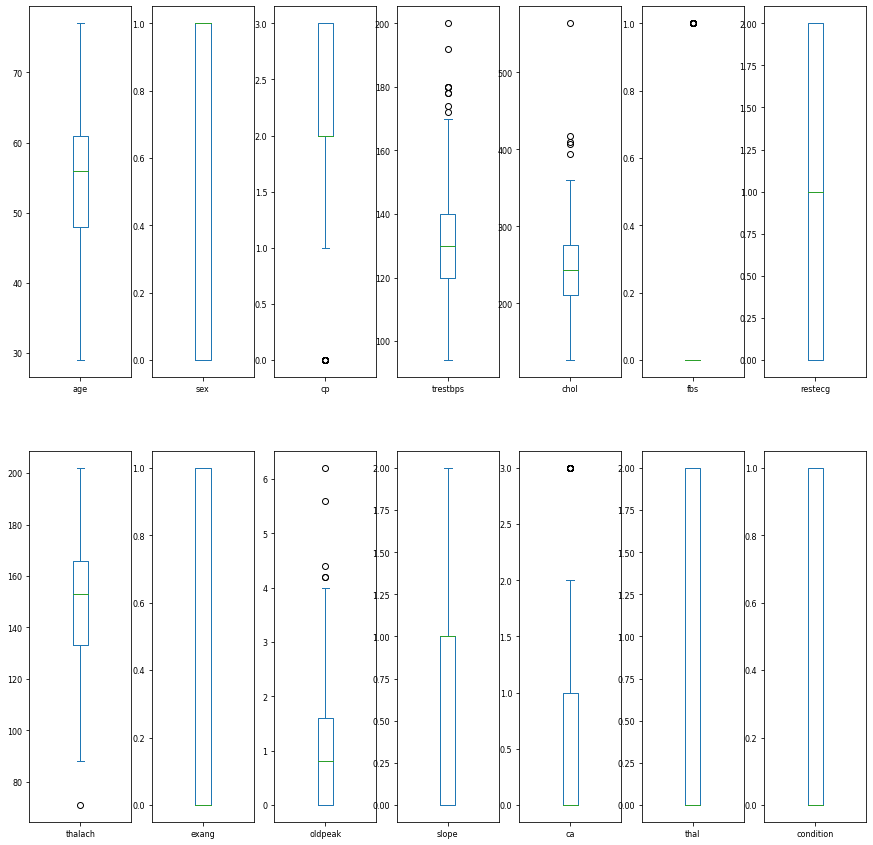

In [93]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.plot(kind='box', subplots=True, layout=(2,7), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()

In [94]:
# Kiểm tra outliner
for k, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 0.00%
Column sex outliers = 0.00%
Column cp outliers = 7.74%
Column trestbps outliers = 4.38%
Column chol outliers = 1.68%
Column fbs outliers = 100.00%
Column restecg outliers = 0.00%
Column thalach outliers = 0.34%
Column exang outliers = 0.00%
Column oldpeak outliers = 2.69%
Column slope outliers = 0.00%
Column ca outliers = 6.73%
Column thal outliers = 0.00%
Column condition outliers = 0.00%


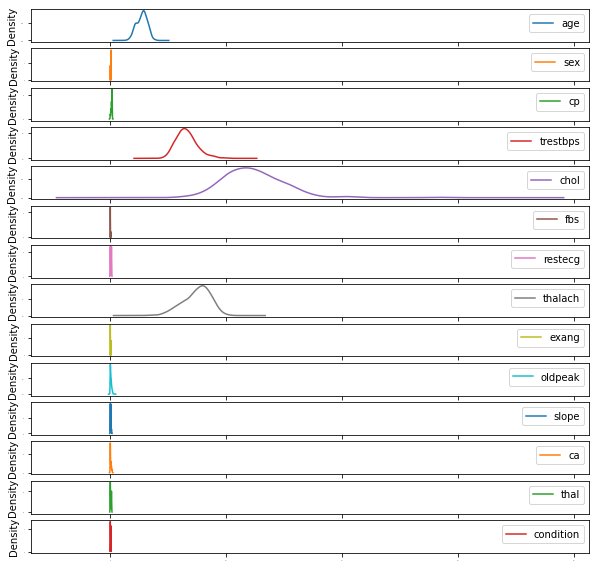

In [95]:
df.plot(kind='density', figsize = (10, 10), subplots=True,fontsize=1)
plt.show()

In [96]:
# Test options and evaluation metric
# X_train
num_folds = 10
scoring = 'accuracy'

In [97]:
seed = 42

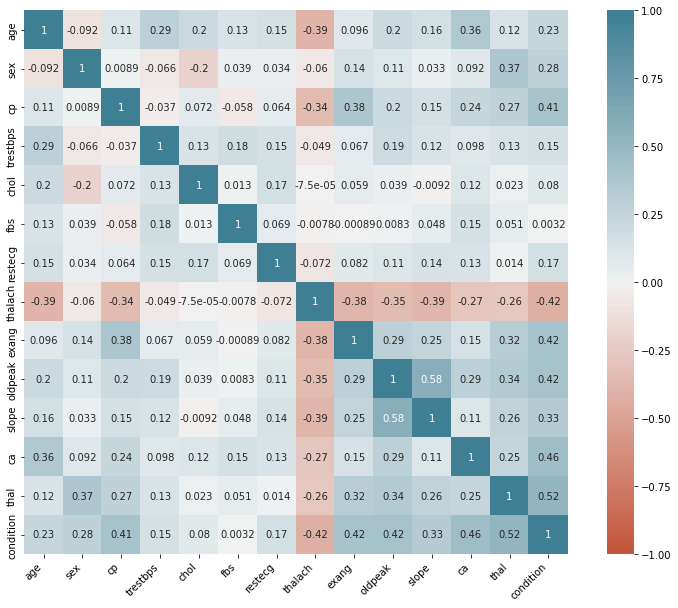

In [98]:
# correlation
set_option('precision', 2)
cor = df.corr(method='pearson')
# select features that have high absolute correlation with output.
fig, ax = plt.subplots(figsize=(14,10))         # Sample figsize in inches
sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [99]:
# SPLITTING TRAIN AND VALIDATION

In [100]:
array = df.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 42
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [101]:
print(X.shape, X_train.shape, X_validation.shape)

(297, 13) (237, 13) (60, 13)


In [102]:
# TRAINING BY USING LOGISTIC REGRESSION

In [103]:
model = LogisticRegression()

In [104]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [105]:
# EVALUATE MODEL BY USING ACCURACY SCORE

In [106]:
# accuracy on training data
Y_train_prediction= model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)



Accuracy on Training data :  0.8734177215189873


In [107]:
# accuracy on validation data
Y_validation_prediction = model.predict(X_validation)
validation_data_accuracy = accuracy_score(Y_validation_prediction, Y_validation)
print('Accuracy on Validation data : ', validation_data_accuracy)

Accuracy on Validation data :  0.7333333333333333


In [108]:
# Test options and evaluation metric
# X_train
num_folds = 10
scoring = 'accuracy'

In [109]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [110]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print('Mean and Std:', msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Mean and Std: LR: 0.856341 (0.069069)
Mean and Std: LDA: 0.860688 (0.065335)
Mean and Std: KNN: 0.688043 (0.051640)
Mean and Std: CART: 0.746920 (0.052493)
Mean and Std: NB: 0.848188 (0.079354)
Mean and Std: SVM: 0.679167 (0.116685)


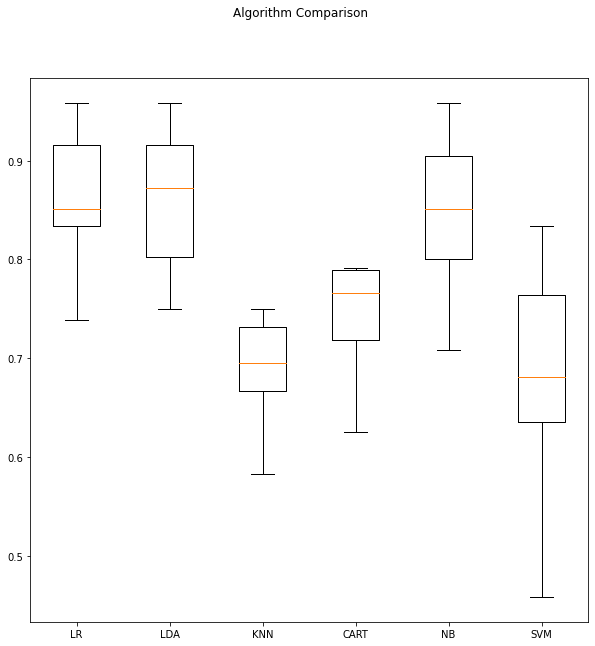

In [111]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [112]:

  # Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.852355 (0.065635)
ScaledLDA: 0.860688 (0.065335)
ScaledKNN: 0.860870 (0.049439)
ScaledCART: 0.755072 (0.059269)
ScaledNB: 0.848188 (0.079354)
ScaledSVM: 0.860870 (0.049439)


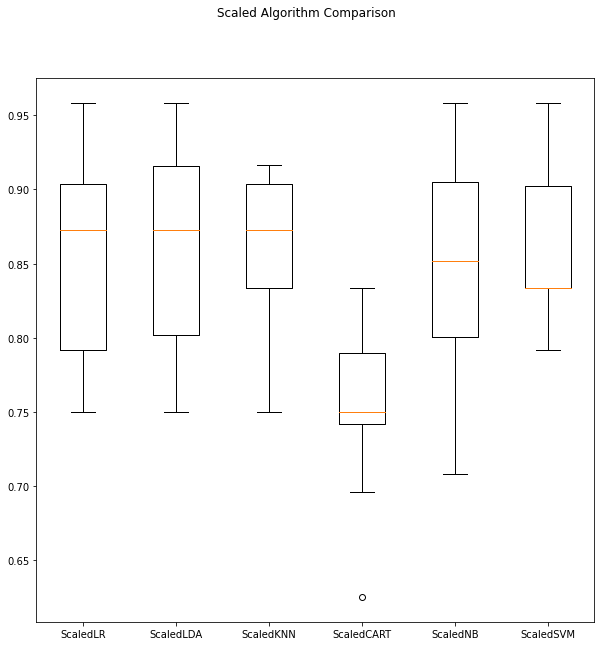

In [113]:
# Compare Algorithms
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [114]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, shuffle= True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.869565 using {'n_neighbors': 13}
0.788587 (0.074399) with: {'n_neighbors': 1}
0.847464 (0.056211) with: {'n_neighbors': 3}
0.851993 (0.035510) with: {'n_neighbors': 5}
0.839674 (0.052606) with: {'n_neighbors': 7}
0.843659 (0.050439) with: {'n_neighbors': 9}
0.856703 (0.056366) with: {'n_neighbors': 11}
0.869565 (0.070359) with: {'n_neighbors': 13}
0.869565 (0.070359) with: {'n_neighbors': 15}
0.860870 (0.069820) with: {'n_neighbors': 17}
0.848370 (0.069901) with: {'n_neighbors': 19}
0.852355 (0.056881) with: {'n_neighbors': 21}


In [115]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.869203 using {'C': 0.1, 'kernel': 'sigmoid'}
0.856703 (0.037961) with: {'C': 0.1, 'kernel': 'linear'}
0.730072 (0.107083) with: {'C': 0.1, 'kernel': 'poly'}
0.860870 (0.049439) with: {'C': 0.1, 'kernel': 'rbf'}
0.869203 (0.047572) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.848188 (0.037895) with: {'C': 0.3, 'kernel': 'linear'}
0.831703 (0.079017) with: {'C': 0.3, 'kernel': 'poly'}
0.856522 (0.033451) with: {'C': 0.3, 'kernel': 'rbf'}
0.860870 (0.037451) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.852536 (0.049554) with: {'C': 0.5, 'kernel': 'linear'}
0.835870 (0.075625) with: {'C': 0.5, 'kernel': 'poly'}
0.860688 (0.056261) with: {'C': 0.5, 'kernel': 'rbf'}
0.848188 (0.032997) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.848188 (0.037895) with: {'C': 0.7, 'kernel': 'linear'}
0.844203 (0.069872) with: {'C': 0.7, 'kernel': 'poly'}
0.852355 (0.062442) with: {'C': 0.7, 'kernel': 'rbf'}
0.848188 (0.032997) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.848188 (0.037895) with: {'C': 0.9, 'kernel': 'lin

In [116]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.823188 (0.076847)
GBM: 0.835326 (0.089150)
RF: 0.852717 (0.058937)
ET: 0.844565 (0.058224)


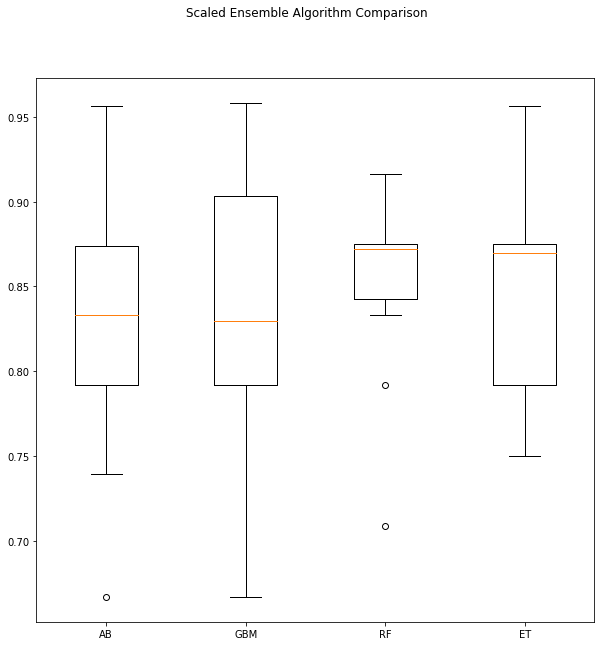

In [117]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [118]:
# prepare the model
# scaler = StandardScaler().fit(X_train)
# rescaledX = scaler.transform(X_train)
model = LogisticRegression()
model.fit(X_train, Y_train)
# estimate accuracy on validation dataset
#rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(X_validation)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [119]:
print(accuracy_score(Y_train, model.predict(X_train)))
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8734177215189873
0.7333333333333333
[[23  9]
 [ 7 21]]
              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74        32
         1.0       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [120]:
validation = pd.DataFrame(data=Y_validation)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff77db1690>]],
      dtype=object)

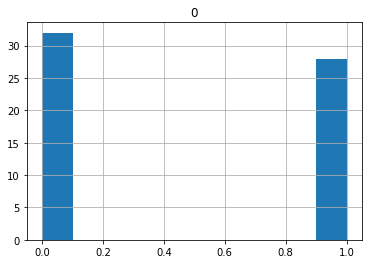

In [121]:
validation.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff781d01d0>]],
      dtype=object)

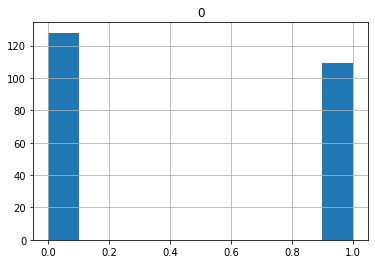

In [122]:
train = pd.DataFrame(data=Y_train)
train.hist()